## POST TEST 6 KECERDASAN BUATAN "UNSUPERVISED LEARNING"
### 2109106036 - EKLECCIA REYDIANTO

#### IMPORT LIBRARY YANG AKAN DIGUNAKAN

In [85]:

import pandas as pd
import numpy as np
import seaborn as sns 
import warnings

In [86]:
warnings.filterwarnings('ignore')

## Import Dataset 

In [70]:
df = pd.read_csv('DataHepatitis.csv')

### Mengecek nilai NULL

In [71]:
df.isna().sum()

ID          0
Age         0
Sex         0
GGT         0
CREA        0
ALB         0
BIL         0
ALT         0
AST         0
PROT        0
ALP         0
CHOL        0
CHE         0
Category    0
dtype: int64

## Data Scalling dan Subset

In [72]:
# Import Library StandardScaler dari sklearn
from sklearn.preprocessing import StandardScaler

In [73]:
df_subset = df[['ALT', 'ALB']]

In [74]:
SS = StandardScaler()

In [75]:
x_scaled = SS.fit_transform(df_subset)

## K-Means Clustering

In [76]:
from sklearn.cluster import KMeans

In [87]:
# n_cluster nernilai 4 karena terdapat 4 kategori penentu dalam dataset
kmeans = KMeans(n_clusters=4 , random_state = 0)

In [88]:
kmeans.fit(x_scaled)

KMeans(n_clusters=4, random_state=0)

In [89]:
labels = kmeans.labels_
print(labels)

[1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 3 3 1 0 0 1 0 0 0 0 3 1 0 3 0
 0 0 0 0 0 1 0 0 3 0 0 0 3 0 0 0 1 0 0 0 0 0 1 0 0 0 0 3 3 1 3 0 0 0 3 0 3
 1 3 0 0 3 1 0 3 0 1 3 0 1 3 1 3 0 0 0 0 3 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 3
 0 0 3 3 1 0 1 1 0 1 0 3 1 3 0 0 0 1 0 1 1 3 3 1 0 0 3 3 3 3 0 1 3 0 0 0 1
 1 1 0 0 0 0 0 3 0 1 0 0 0 0 0 3 0 0 0 3 0 0 1 0 0 3 0 1 0 0 1 0 0 3 0 0 0
 1 1 1 0 0 1 0 0 3 0 0 3 0 1 1 3 0 0 3 0 1 1 0 0 0 0 0 0 3 3 0 1 0 0 1 3 1
 0 1 0 0 3 0 0 1 0 1 0 1 0 0 0 0 3 1 3 0 1 0 1 0 0 1 0 1 1 1 0 1 0 1 0 0 0
 3 0 0 0 0 1 1 0 0 0 1 1 0 0 1 3 0 1 0 3 0 0 0 1 0 1 0 0 1 3 1 0 1 0 1 1 0
 1 3 3 0 1 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 3 1 1 1 0 0 1 1 1 1 1
 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 3 1 0 1 0 1 1 0 0 1 1 1 1 0 1 1 0 3 1 1
 0 1 0 1 0 1 1 0 1 1 1 1 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1
 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 3 0 0 0 0 1 1 1 1 1 1 1 0 0 1 0 0 1
 1 1 3 1 1 1 1 0 0 0 0 1 3 0 0 0 1 0 1 0 1 1 1 0 1 1 0 0 1 1 0 0 1 1 0 1 0
 0 1 1 1 1 1 1 1 1 0 1 0 

## Evaluasi K-Means Menggunakan CROSS TAB 
## Untuk membandingkan antar cluster

### Membuat dataframe yang memiliki kolom labels dan categori dimana labels berisi labels dan categori berisi categori

In [100]:
df_kmeans = pd.DataFrame({'labels':labels, 'category':df.Category})

In [91]:
ct_1 = pd.crosstab(df_kmeans['labels'], df_kmeans['category'])

In [92]:
print(ct_1)

category  0=Blood Donor  0s=suspect Blood Donor  1=Hepatitis  2=Fibrosis  \
labels                                                                     
0                   255                       0           13           6   
1                   213                       4            5           4   
2                     0                       2            0           0   
3                    58                       1            2           2   

category  3=Cirrhosis  
labels                 
0                   0  
1                  23  
2                   0  
3                   0  


## Menampilkan Centroid tiap cluster

In [93]:
import matplotlib.pyplot as plt

In [94]:
print(x_scaled)

[[-0.90775105 -0.54480956]
 [-0.4134866  -0.54480956]
 [ 0.45987388  0.91471388]
 ...
 [-0.99412736 -1.6742027 ]
 [-1.13808787 -3.06422502]
 [-1.10929577 -2.19546107]]


In [95]:
xs = x_scaled[:,0]
ys = x_scaled [:,1]

In [96]:
centroids = kmeans.cluster_centers_
centroids_x = centroids[:,0]
centroids_y = centroids[:, 1]

#### Label Aktual

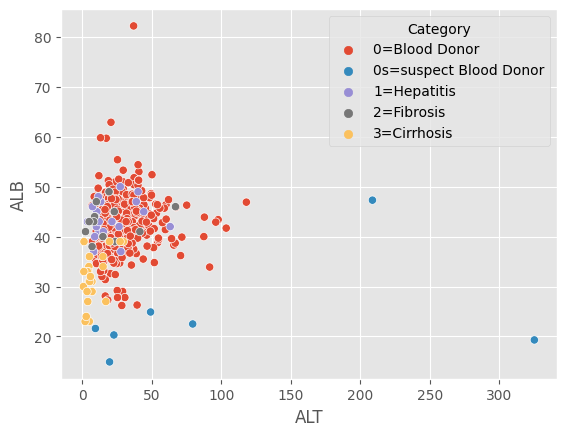

In [97]:
df_aktual = df[["ALT", "ALB", "Category"]]
sns.scatterplot(x = "ALT", y = "ALB", data = df_aktual, hue = "Category")
plt.show()

## Visualisasi Centroid

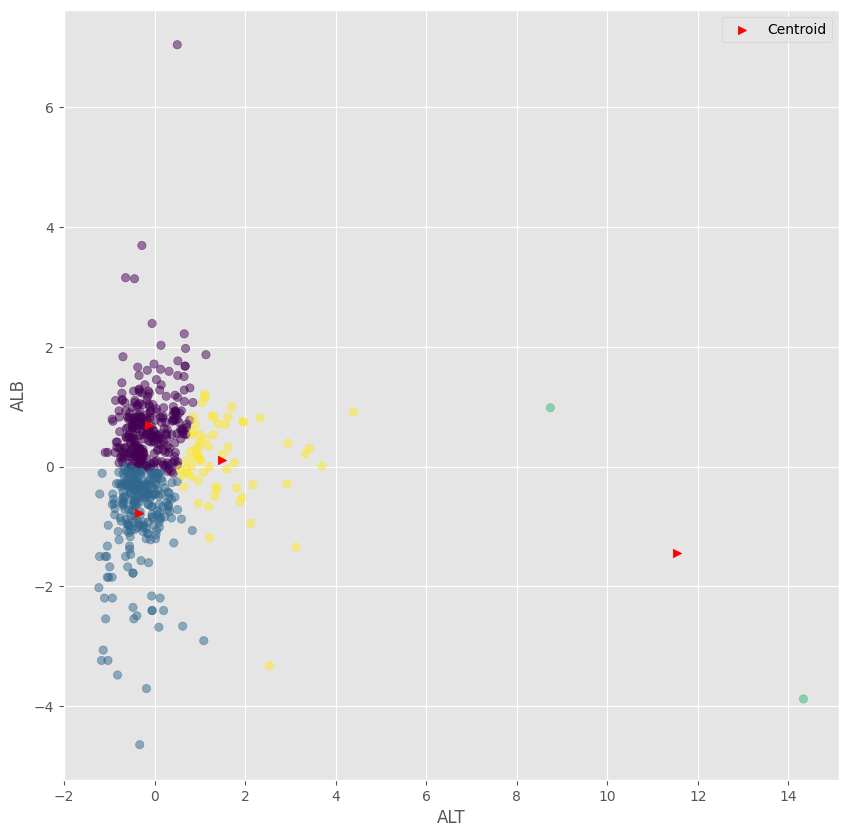

In [98]:
plt.style.use('ggplot')
plt.figure(figsize = (10,10))
plt.scatter(xs, ys, c=labels, alpha=0.5)
plt.scatter(centroids_x, centroids_y, marker = '>', c = 'red', label = "Centroid")
plt.xlabel("ALT")
plt.ylabel("ALB")
plt.legend()
plt.show()

## Visualisasi Inertia

<function matplotlib.pyplot.show(close=None, block=None)>

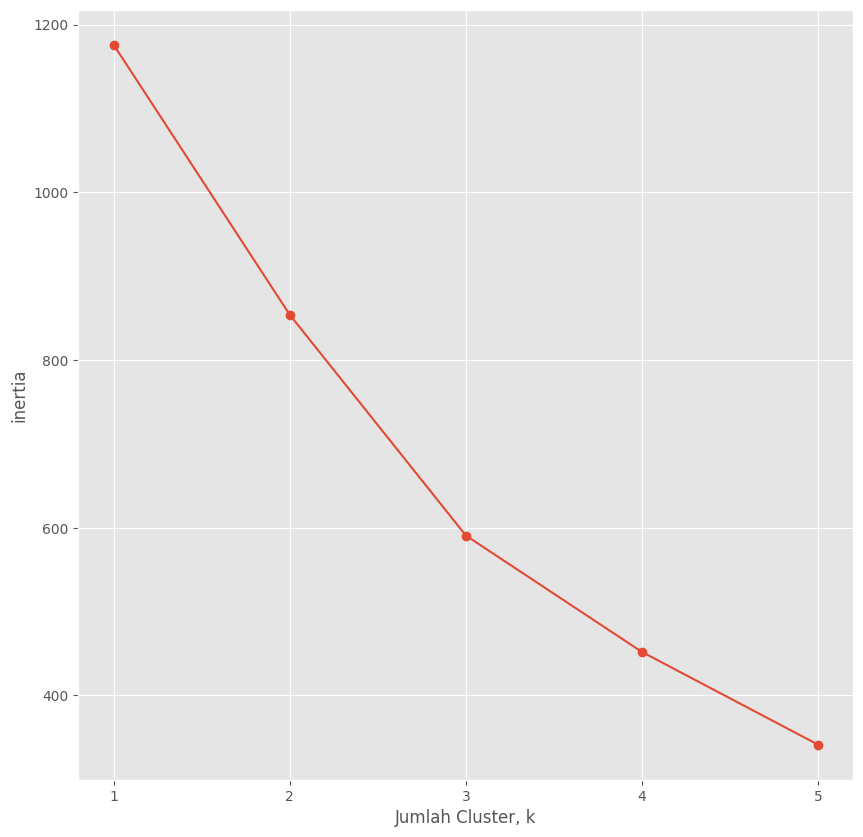

In [99]:
ks = range (1,6)
inertias = []
for k in ks :
    model = KMeans(n_clusters=k)
    model.fit(x_scaled)
    inertias.append(model.inertia_) #mengukur sbrp bagus algo itu melakukan clustering

#plot ks vs inertias
plt.figure(figsize=(10,10))
plt.plot(ks, inertias, '-o')
plt.xlabel('Jumlah Cluster, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show
    